<h2>EDA - Análisis exploratorio de los datos sobre taxis en Nueva York</h2>

<h3>Contexto</h3>

<p style="font-size:16px;">Los servicios de transporte en Nueva York, como los taxis y Uber, han revolucionado la movilidad urbana. Estas alternativas ofrecen una forma conveniente y accesible de desplazarse, transformando la percepción sobre el transporte público y el alquiler de coches.</p>

<p style="font-size:16px;">El problema del cambio climático, provocado en gran medida por el uso de energías provenientes de combustibles fósiles en los vehículos, ha alcanzado niveles críticos. Las compañías se ven instadas a actuar frente a estos desafíos ambientales, lo que implica la necesidad de medir y mejorar los niveles de consumo y generación energética. Esta conciencia conduce a la búsqueda de soluciones para mitigar dicho impacto en el medio ambiente. </p>

<h3>Objetivos</h3>

<p style="font-size:16px;">El objetivo es realizar un EDA (Análisis exploratorio de los datos) para poder encontrar relaciones en los datos que nos permitan realizar un análisis profundo y encontrar posibles causas y conclusiones a la hora de abordar la problemática de los taxis en Nueva York.</p>

<p style="font-size:16px;">En este EDA abordaremos:</p>

<ul>
  <li>Posibles valores nulos</li>
  <li>Posibles registros duplicados</li>
  <li>Posibles valores outliers</li>
  <li>Gráficos representativos con su correspondiente análisis</li>
  <li>Conclusiones</li>
</ul>

<p style="font-size:17px;"><u>Importo las librerías a utilizar</u> </p>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd

<p style="font-size:17px;"><u>Lectura de los datos disponibles</u></p>


<p style="font-size:15px;">Observo los datos y columnas del dataset de los taxis</p>

In [63]:
df_taxis = pd.read_parquet('Datasets/limpios/taxis.parquet')
df_taxis.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,ehail_fee,trip_type,taxi_type
0,VeriFone Inc.,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,Standard rate,not a store and forward trip,186,79,Cash,...,0.5,0.00,0.0,1.0,22.70,2.5,None,None,NaN,yellow
1,"Creative Mobile Technologies, LLC",2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,Standard rate,not a store and forward trip,140,236,Credit card,...,0.5,3.75,0.0,1.0,18.75,2.5,None,None,NaN,yellow
2,"Creative Mobile Technologies, LLC",2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,Standard rate,not a store and forward trip,236,79,Credit card,...,0.5,3.00,0.0,1.0,31.30,2.5,None,None,NaN,yellow
3,"Creative Mobile Technologies, LLC",2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,Standard rate,not a store and forward trip,79,211,Credit card,...,0.5,2.00,0.0,1.0,17.00,2.5,None,None,NaN,yellow
4,"Creative Mobile Technologies, LLC",2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,Standard rate,not a store and forward trip,211,148,Credit card,...,0.5,3.20,0.0,1.0,16.10,2.5,None,None,NaN,yellow


In [64]:
df_taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021158 entries, 0 to 56550
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               object        
 1   pickup_datetime        datetime64[us]
 2   dropoff_datetime       datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             object        
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           object        
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            object

<p style="font-size:15px;">Observo los datos y columnas del dataset de localizacion</p>

In [65]:
df_localizacion = pd.read_parquet('Datasets/limpios/localizacion.parquet')
df_localizacion.head()

,LocationID,Borough,Zone,service_zone,Shape_Leng,Shape_Area
0,1,EWR,Newark Airport,EWR,0.116357,0.000782
1,2,Queens,Jamaica Bay,Boro Zone,0.433470,0.004866
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,0.084341,0.000314
3,4,Manhattan,Alphabet City,Yellow Zone,0.043567,0.000112
4,5,Staten Island,Arden Heights,Boro Zone,0.092146,0.000498


In [66]:
df_localizacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationID    263 non-null    int64  
 1   Borough       263 non-null    object 
 2   Zone          263 non-null    object 
 3   service_zone  263 non-null    object 
 4   Shape_Leng    263 non-null    float64
 5   Shape_Area    263 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.4+ KB


<p style="font-size:15px;">Observo los datos y columnas del dataset autos_combustion</p>

In [67]:
df_combustion = pd.read_parquet('Datasets/limpios/autos_combustion.parquet')
df_combustion.tail()

,Model,Model Year,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Manufacturer,Category,Fuel,Drivetrain,co2,co2TailpipeGpm,fuelType
538,S90 AWD,2021,28.0,31.0,30.0,Auto,SI,2.0L,4.0,Volvo,Sedan/Wagon,Plug-in Hybrid Electric,None,356.0,356.0,Premium
539,XC60 AWD,2021,26.0,28.0,27.0,Auto,SI,2.0L,4.0,Volvo,SUV,Plug-in Hybrid Electric,None,375.0,375.0,Premium
540,XC60 AWD,2021,26.0,28.0,27.0,Auto,SI,2.0L,4.0,Volvo,SUV,Plug-in Hybrid Electric,None,386.0,386.0,Premium
541,XC90 AWD,2021,26.0,28.0,27.0,Auto,SI,2.0L,4.0,Volvo,SUV,Plug-in Hybrid Electric,None,394.0,394.0,Premium
542,XC90 AWD,2021,26.0,28.0,27.0,Auto,SI,2.0L,4.0,Volvo,SUV,Plug-in Hybrid Electric,None,380.0,380.0,Premium


In [68]:
df_combustion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 542
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               543 non-null    object 
 1   Model Year                          543 non-null    int64  
 2   Conventional Fuel Economy City      474 non-null    float64
 3   Conventional Fuel Economy Highway   474 non-null    float64
 4   Conventional Fuel Economy Combined  474 non-null    float64
 5   Transmission Type                   539 non-null    object 
 6   Engine Type                         541 non-null    object 
 7   Engine Size                         541 non-null    object 
 8   Engine Cylinder Count               474 non-null    float64
 9   Manufacturer                        543 non-null    object 
 10  Category                            543 non-null    object 
 11  Fuel                                543 non-null  

<p style="font-size:15px;">Observo los datos y columnas del dataset de autos_electricos</p>

In [69]:
df_electricos = pd.read_parquet('Datasets/limpios/autos_electricos.parquet')
df_electricos.tail()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
100,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
101,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
102,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
103,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
104,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [70]:
df_electricos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        105 non-null    object 
 1   Model        105 non-null    object 
 2   Accel        105 non-null    float64
 3   TopSpeed     105 non-null    int64  
 4   Range        105 non-null    int64  
 5   Efficiency   105 non-null    int64  
 6   FastCharge   105 non-null    object 
 7   RapidCharge  105 non-null    object 
 8   PowerTrain   105 non-null    object 
 9   PlugType     105 non-null    object 
 10  BodyStyle    105 non-null    object 
 11  Segment      105 non-null    object 
 12  Seats        105 non-null    int64  
 13  PriceEuro    105 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 12.3+ KB


<p style="font-size:18px;"><u>Verificación de la existencia de valores nulos</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de taxis</p>

In [71]:
df_taxis.isnull().sum()

VendorID                     260
pickup_datetime                0
dropoff_datetime               0
passenger_count           143577
trip_distance                  0
RatecodeID                172243
store_and_fwd_flag        143577
PULocationID                   0
DOLocationID                   0
payment_type              143577
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      143577
Airport_fee              3021158
ehail_fee                3021158
trip_type                2968027
taxi_type                      0
dtype: int64

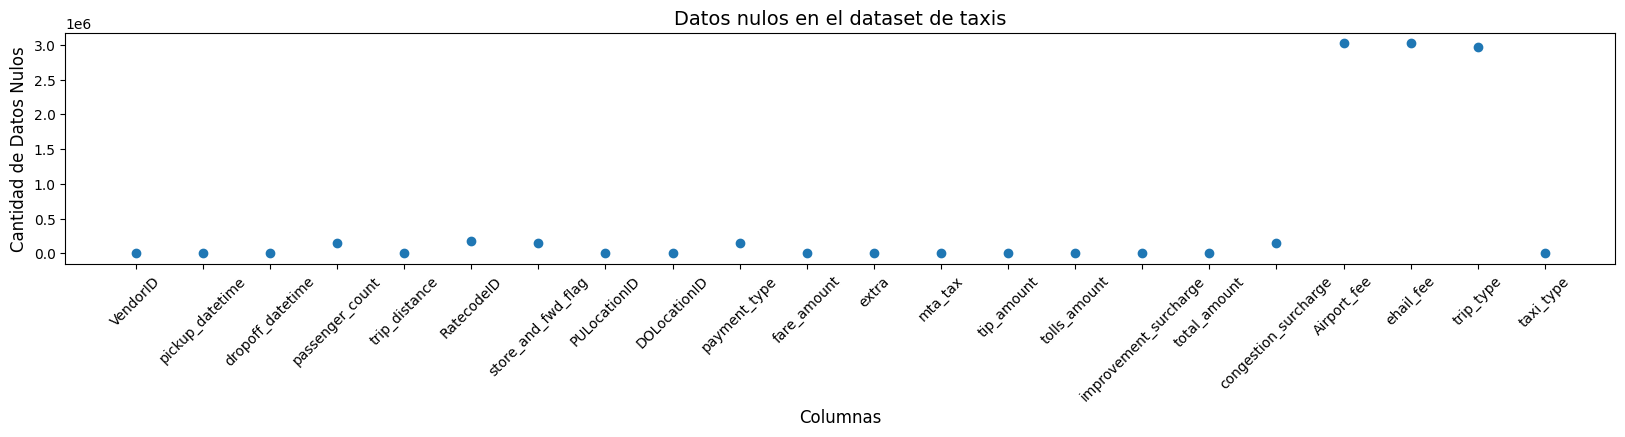

In [72]:
nulos = df_taxis.isnull().sum()
plt.figure(figsize=(20, 3))
plt.scatter(nulos.index, nulos.values)
plt.title('Datos nulos en el dataset de taxis', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [73]:
df_taxis_cleaned = df_taxis.dropna(subset=['passenger_count', 'VendorID', 'RatecodeID'])

In [74]:
df_taxis_cleaned.isnull().sum()

VendorID                       0
pickup_datetime                0
dropoff_datetime               0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
Airport_fee              2848915
ehail_fee                2848915
trip_type                2795784
taxi_type                      0
dtype: int64

Los nulos de la columna 'passenger_count' también estaban en las demás filas, por lo que dropeando los nulos de la primer columna mencionada se dropean todos los del DataFrame.

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de localizacion</p>

In [75]:
df_localizacion.isnull().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
Shape_Leng      0
Shape_Area      0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de autos_combustion</p>

In [76]:
df_combustion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 542
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               543 non-null    object 
 1   Model Year                          543 non-null    int64  
 2   Conventional Fuel Economy City      474 non-null    float64
 3   Conventional Fuel Economy Highway   474 non-null    float64
 4   Conventional Fuel Economy Combined  474 non-null    float64
 5   Transmission Type                   539 non-null    object 
 6   Engine Type                         541 non-null    object 
 7   Engine Size                         541 non-null    object 
 8   Engine Cylinder Count               474 non-null    float64
 9   Manufacturer                        543 non-null    object 
 10  Category                            543 non-null    object 
 11  Fuel                                543 non-null  

In [77]:
df_combustion.isnull().sum()

Model                                   0
Model Year                              0
Conventional Fuel Economy City         69
Conventional Fuel Economy Highway      69
Conventional Fuel Economy Combined     69
Transmission Type                       4
Engine Type                             2
Engine Size                             2
Engine Cylinder Count                  69
Manufacturer                            0
Category                                0
Fuel                                    0
Drivetrain                            259
co2                                     0
co2TailpipeGpm                          0
fuelType                                0
dtype: int64

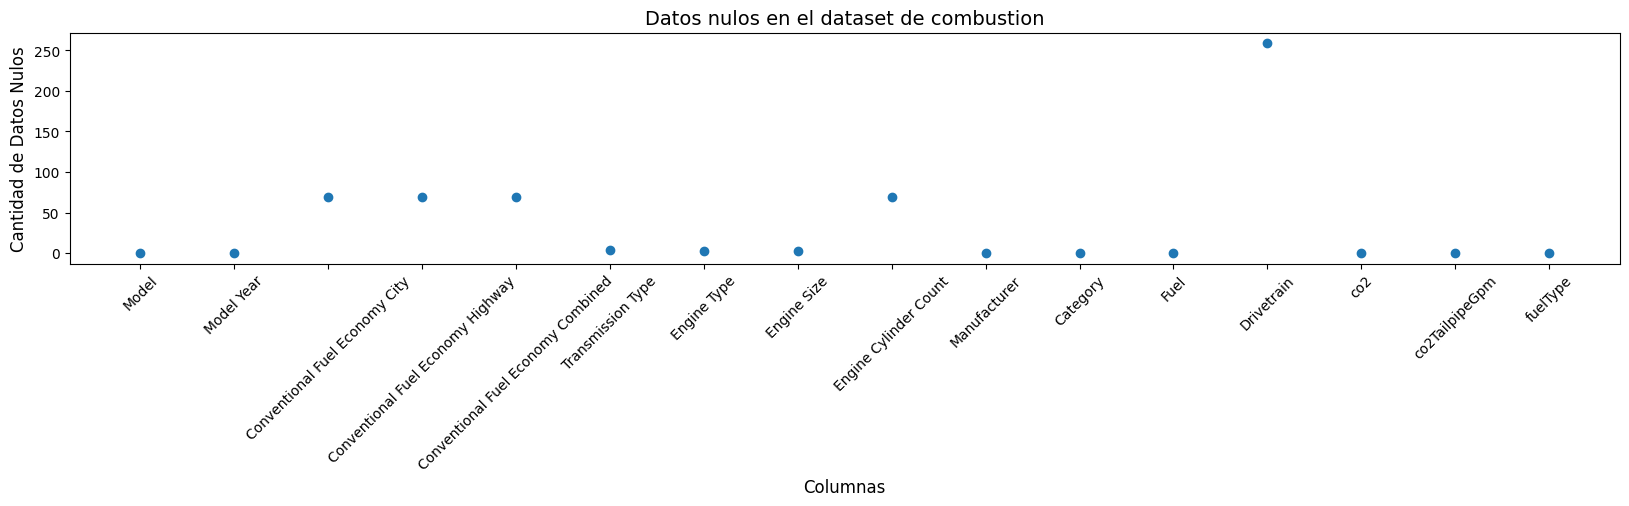

In [78]:
combustion_nulos = df_combustion.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(combustion_nulos.index, combustion_nulos.values)
plt.title('Datos nulos en el dataset de combustion', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [79]:
df_combustion_cleaned = df_combustion.dropna(subset=['Engine Cylinder Count', 'Engine Type'])
df_combustion_cleaned.drop(columns='Drivetrain', inplace=True)

C:\Users\augus\AppData\Local\Temp\ipykernel_11484\2849261935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combustion_cleaned.drop(columns='Drivetrain', inplace=True)


In [80]:
df_combustion_cleaned.isnull().sum()

Model                                 0
Model Year                            0
Conventional Fuel Economy City        0
Conventional Fuel Economy Highway     0
Conventional Fuel Economy Combined    0
Transmission Type                     0
Engine Type                           0
Engine Size                           0
Engine Cylinder Count                 0
Manufacturer                          0
Category                              0
Fuel                                  0
co2                                   0
co2TailpipeGpm                        0
fuelType                              0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de autos_electricos</p>

In [81]:
df_electricos.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

<p style="font-size:18px;"><u>Valores outliers</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores outliers mediante el Método del Rango Intercuartil (IQR)</p>
<p style="font-size:15px;">El método IQR es una técnica común para detectar outliers. Los valores que caen por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR son considerados outliers.</p>

In [82]:
def detectar_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers_green_taxis = detectar_outliers_iqr(df_taxis_cleaned)
print("\nOutliers en 'df_taxis_cleaned':")
for column, outliers in outliers_green_taxis.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_caracteristicas = detectar_outliers_iqr(df_electricos)
print("\nOutliers en 'df_electricos':")
for column, outliers in outliers_caracteristicas.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_localizaciones = detectar_outliers_iqr(df_localizacion)
print("\nOutliers en 'df_localizacion':")
for column, outliers in outliers_localizaciones.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_emision = detectar_outliers_iqr(df_combustion_cleaned)
print("\nOutliers en 'df_combustion_cleaned':")
for column, outliers in outliers_emision.items():
    print(f"{column}: {len(outliers)} outliers")


Outliers en 'df_taxis_cleaned':
passenger_count: 643996 outliers
trip_distance: 364424 outliers
fare_amount: 317841 outliers
extra: 47326 outliers
mta_tax: 72515 outliers
tip_amount: 208480 outliers
tolls_amount: 201361 outliers
improvement_surcharge: 37232 outliers
total_amount: 353905 outliers
congestion_surcharge: 271031 outliers
trip_type: 1736 outliers

Outliers en 'df_electricos':
Accel: 1 outliers
TopSpeed: 1 outliers
Range: 2 outliers
Efficiency: 7 outliers
Seats: 32 outliers
PriceEuro: 6 outliers

Outliers en 'df_localizacion':
LocationID: 0 outliers
Shape_Leng: 9 outliers
Shape_Area: 17 outliers

Outliers en 'df_combustion_cleaned':
Model Year: 0 outliers
Conventional Fuel Economy City: 58 outliers
Conventional Fuel Economy Highway: 24 outliers
Conventional Fuel Economy Combined: 43 outliers
Engine Cylinder Count: 0 outliers
co2: 0 outliers
co2TailpipeGpm: 0 outliers


Representación de outliers de Taxis.

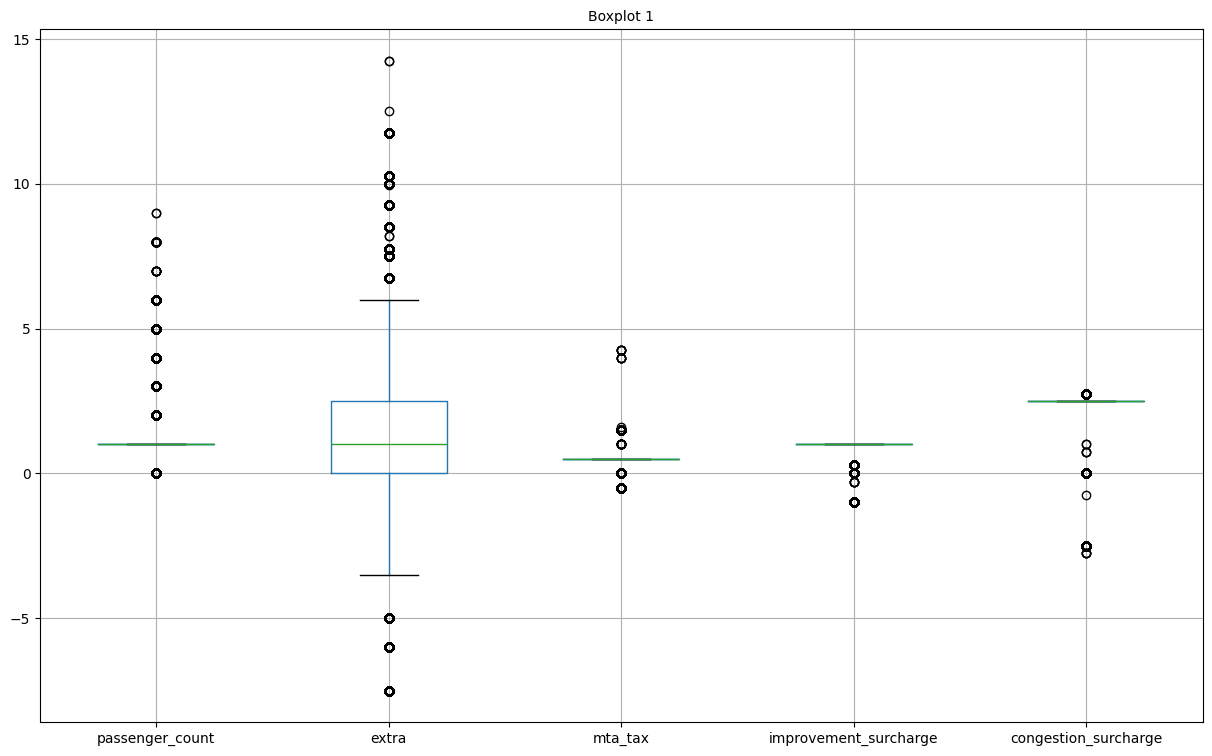

In [83]:
num_cols = ['passenger_count', 'payment_type', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

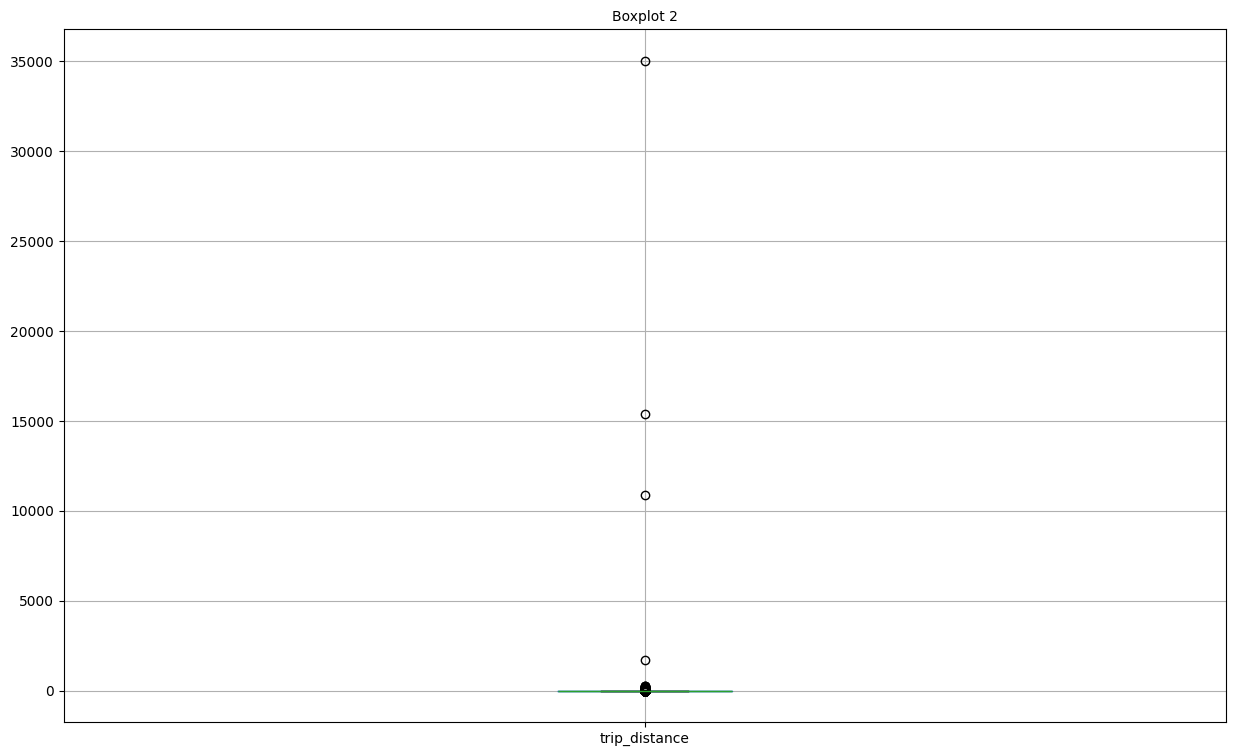

In [84]:
num_cols = ['trip_distance']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

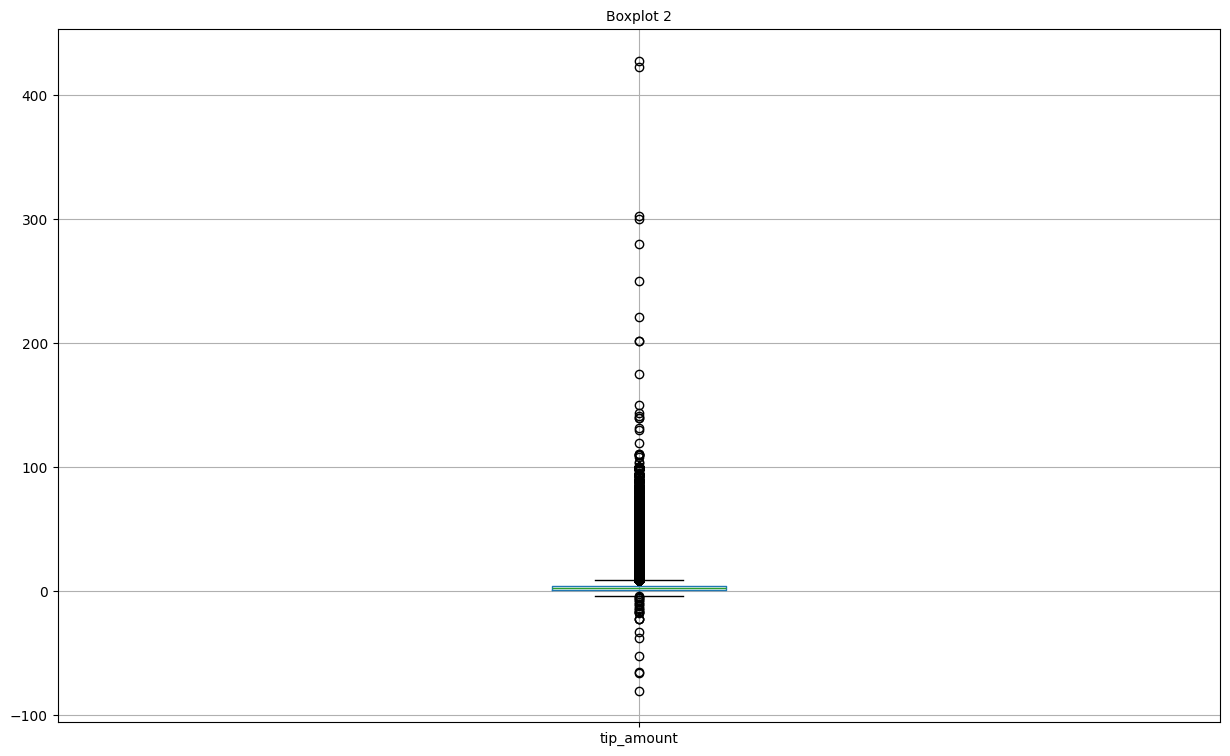

In [85]:
num_cols = ['tip_amount']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

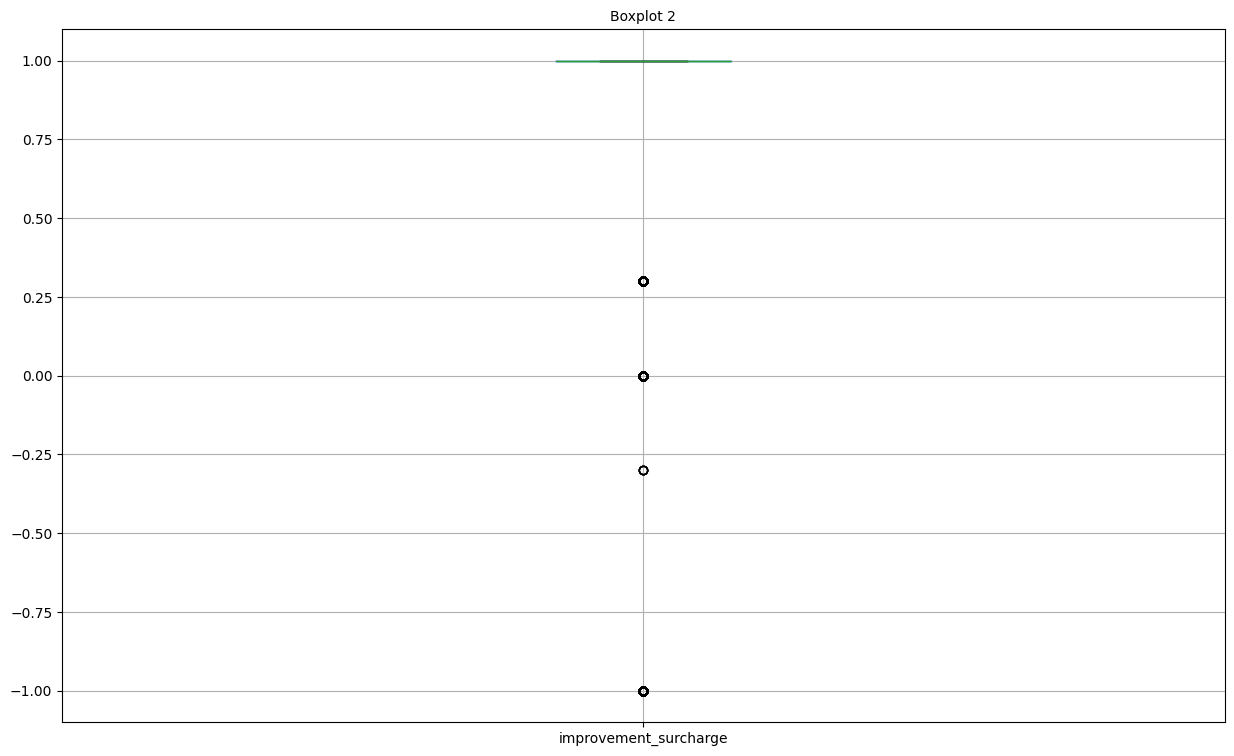

In [86]:
num_cols = ['improvement_surcharge']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

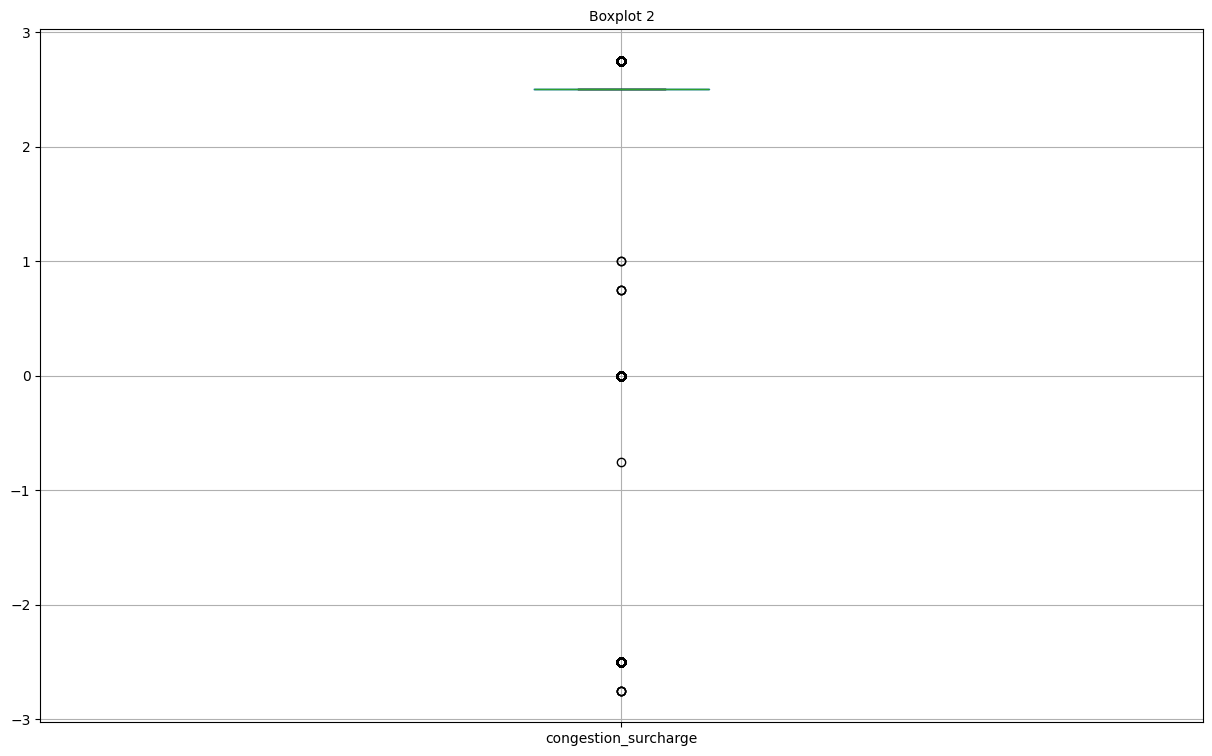

In [87]:
num_cols = ['congestion_surcharge']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

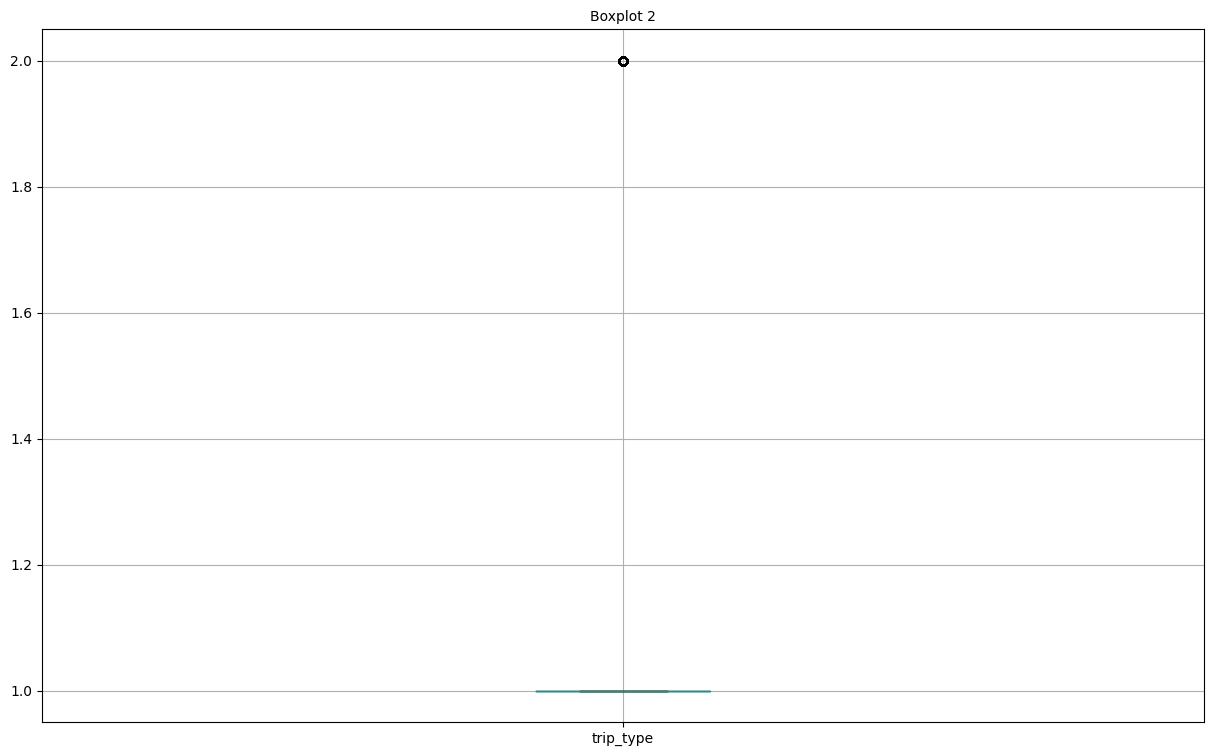

In [88]:
num_cols = ['trip_type']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

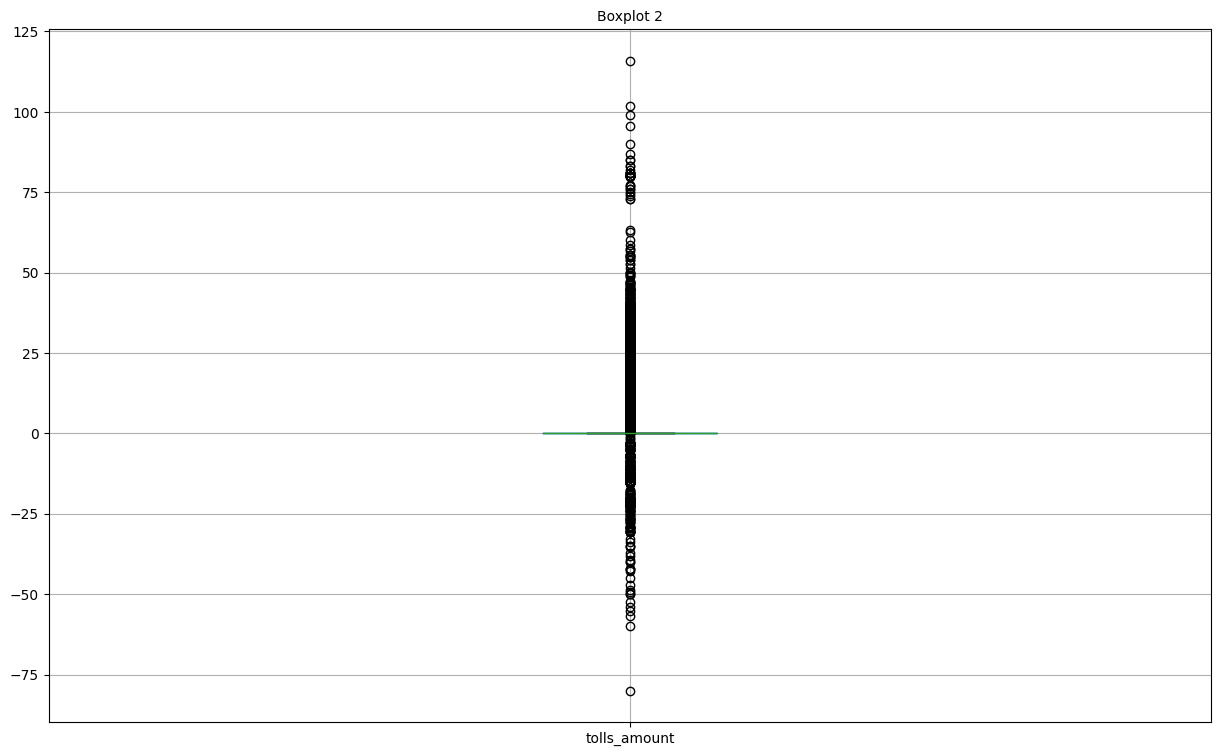

In [89]:
num_cols = ['tolls_amount']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

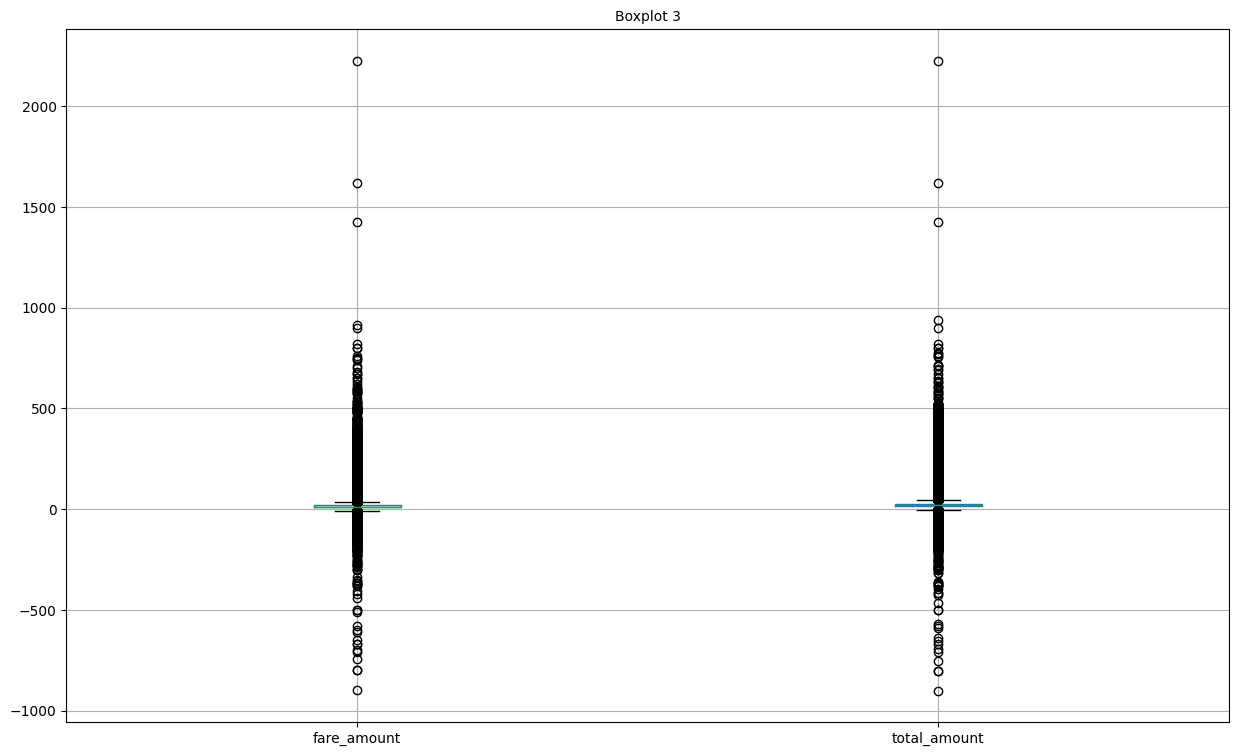

In [90]:
num_cols = ['fare_amount', 'total_amount']

plt.figure(figsize=(15,9))
df_taxis_cleaned[num_cols].boxplot()
plt.title("Boxplot 3", fontsize=10)
plt.show()

Representacion outliers autos_electricos

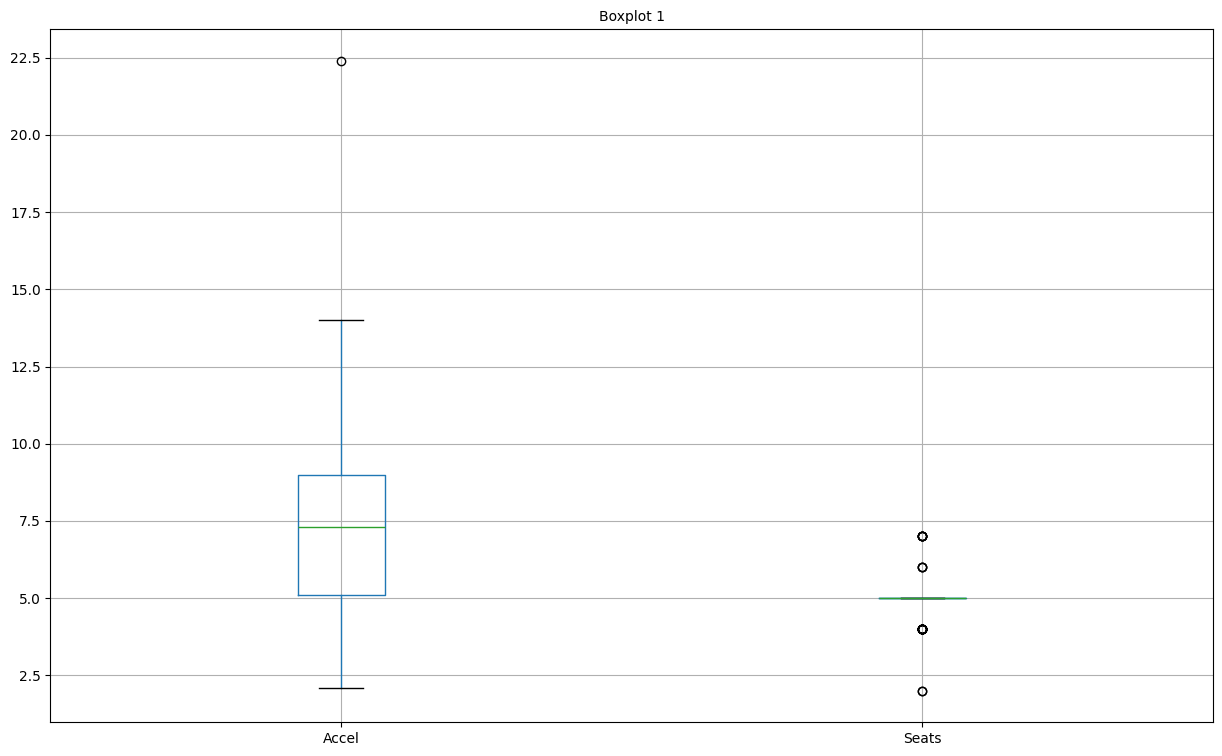

In [91]:
num_cols = ['Accel', 'Seats']

plt.figure(figsize=(15,9))
df_electricos[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

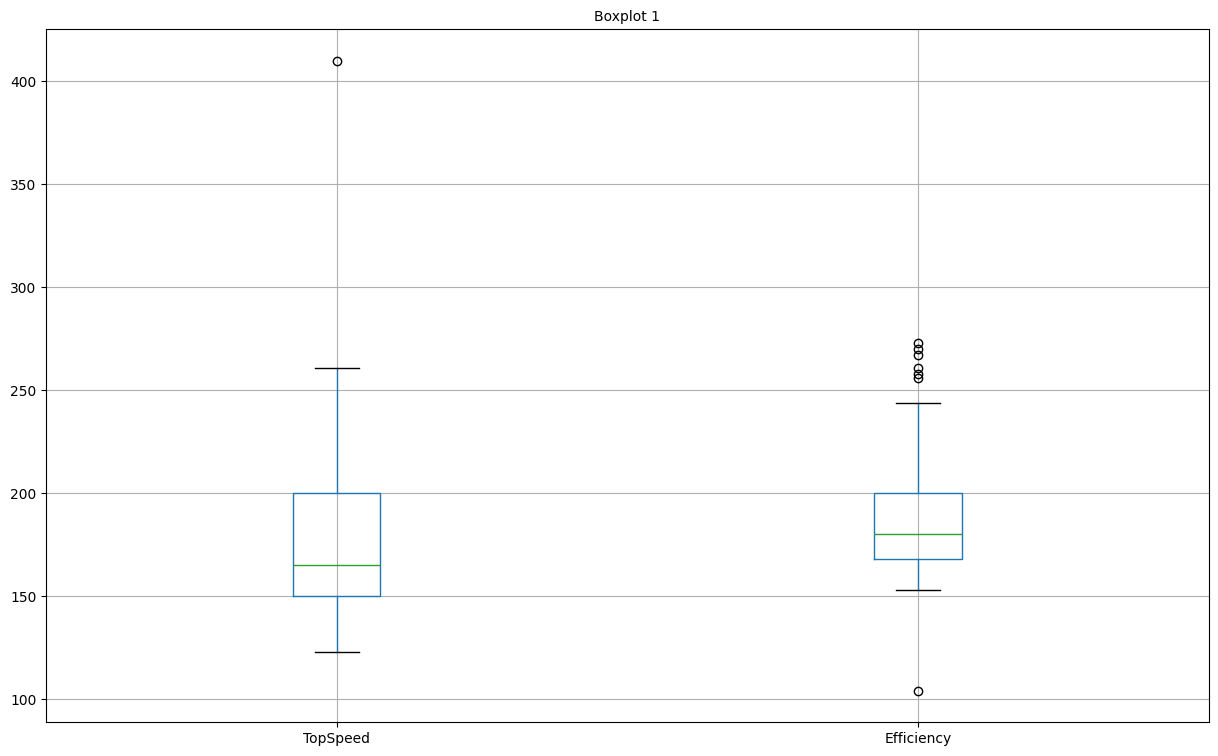

In [92]:
num_cols = ['TopSpeed', 'Efficiency']

plt.figure(figsize=(15,9))
df_electricos[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

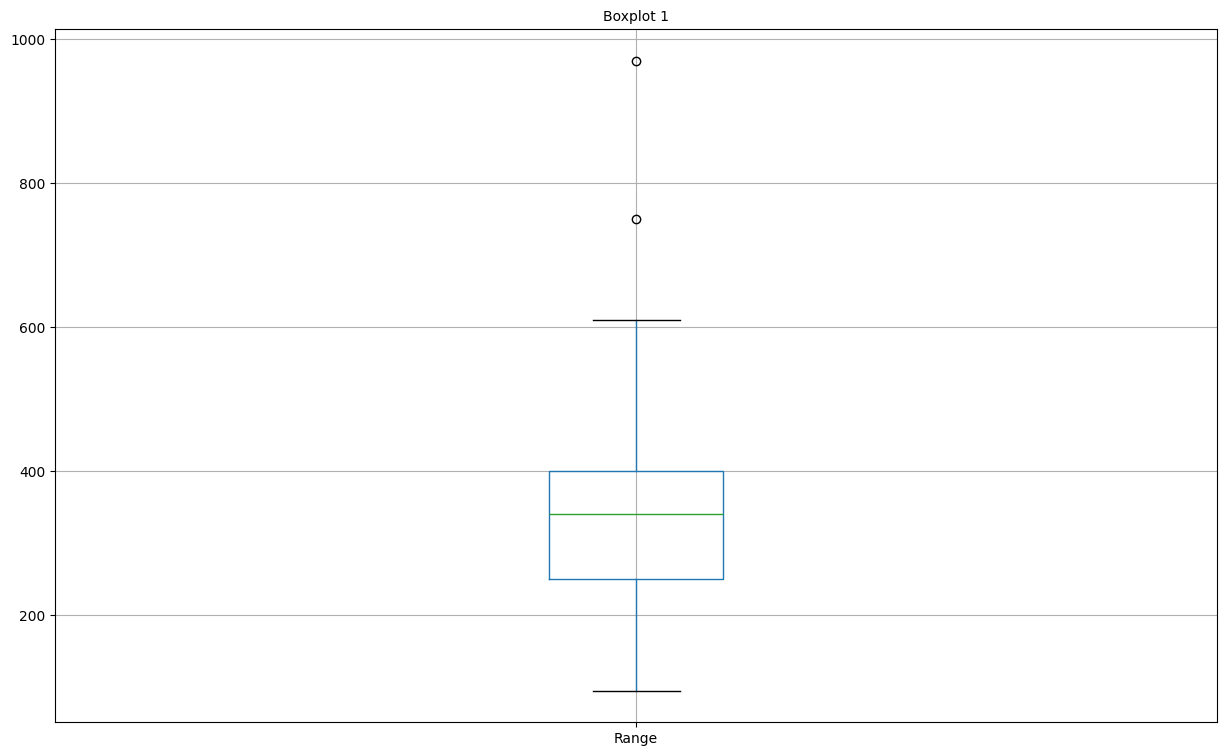

In [93]:
num_cols = ['Range']

plt.figure(figsize=(15,9))
df_electricos[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

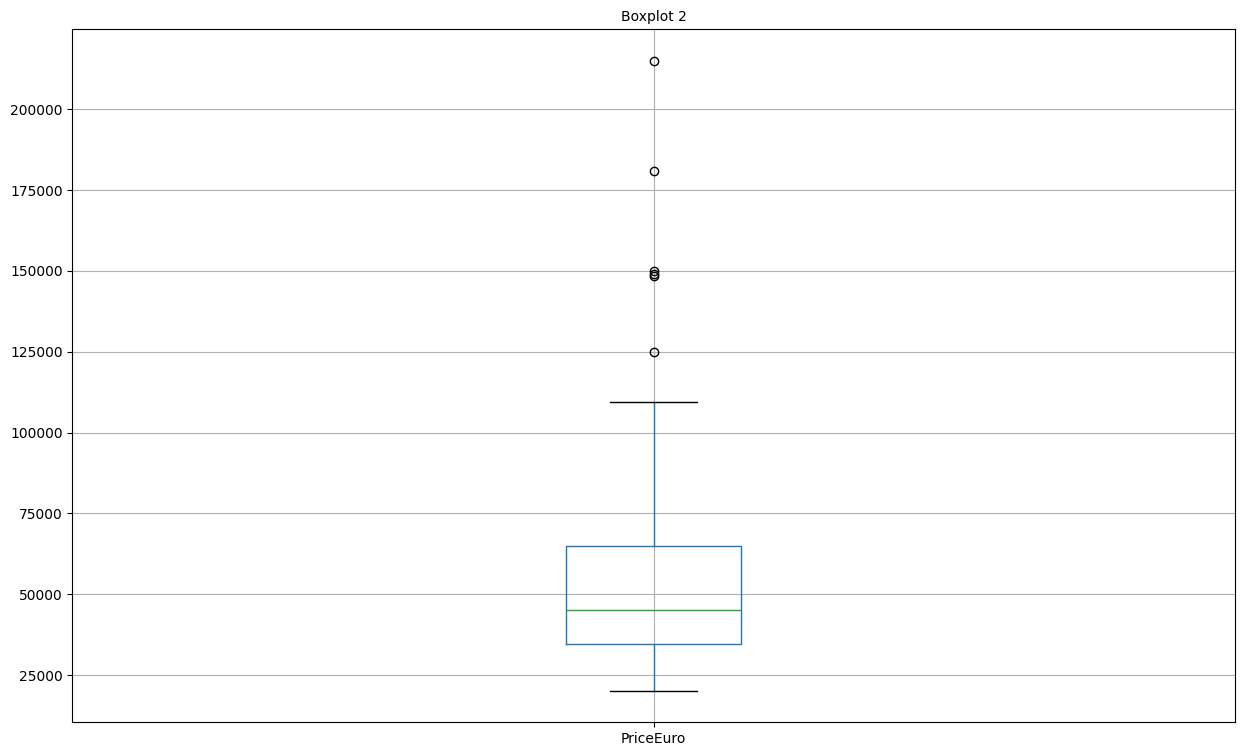

In [94]:
num_cols = ['PriceEuro']

plt.figure(figsize=(15,9))
df_electricos[num_cols].boxplot()
plt.title("Boxplot 2", fontsize=10)
plt.show()

Representacion outliers de locacion

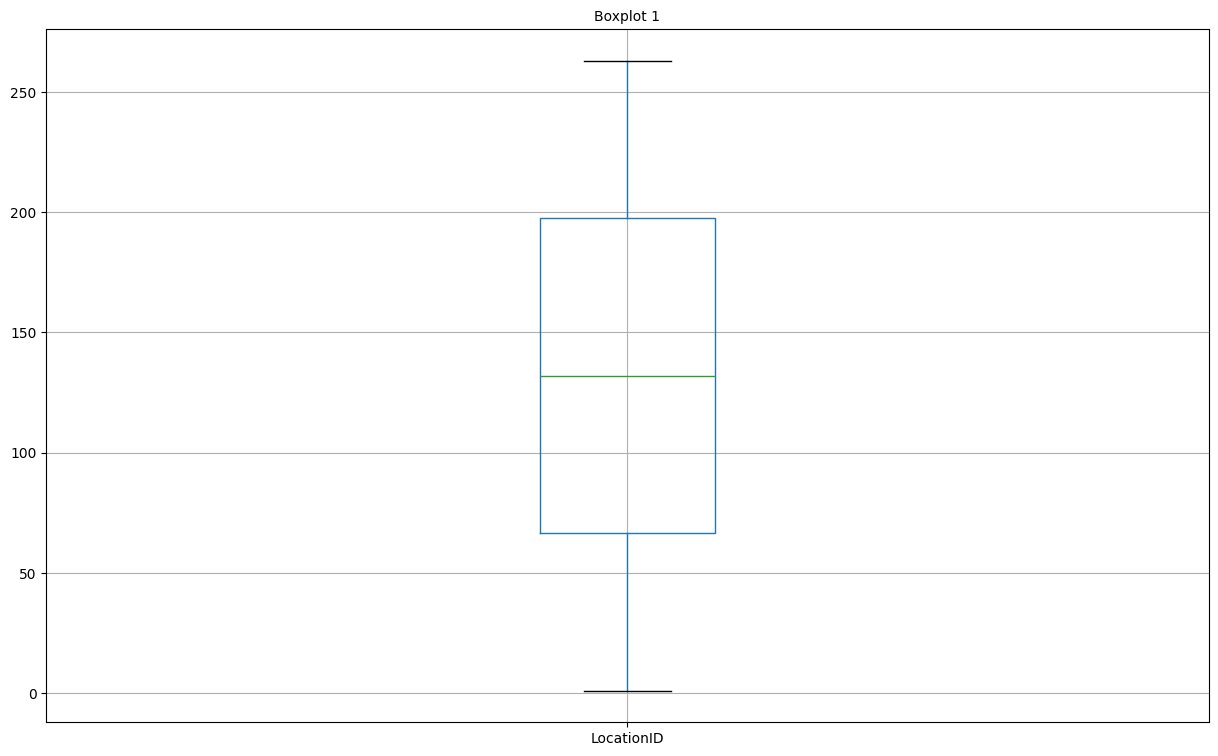

In [95]:
num_cols = ['LocationID']

plt.figure(figsize=(15,9))
df_localizacion[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

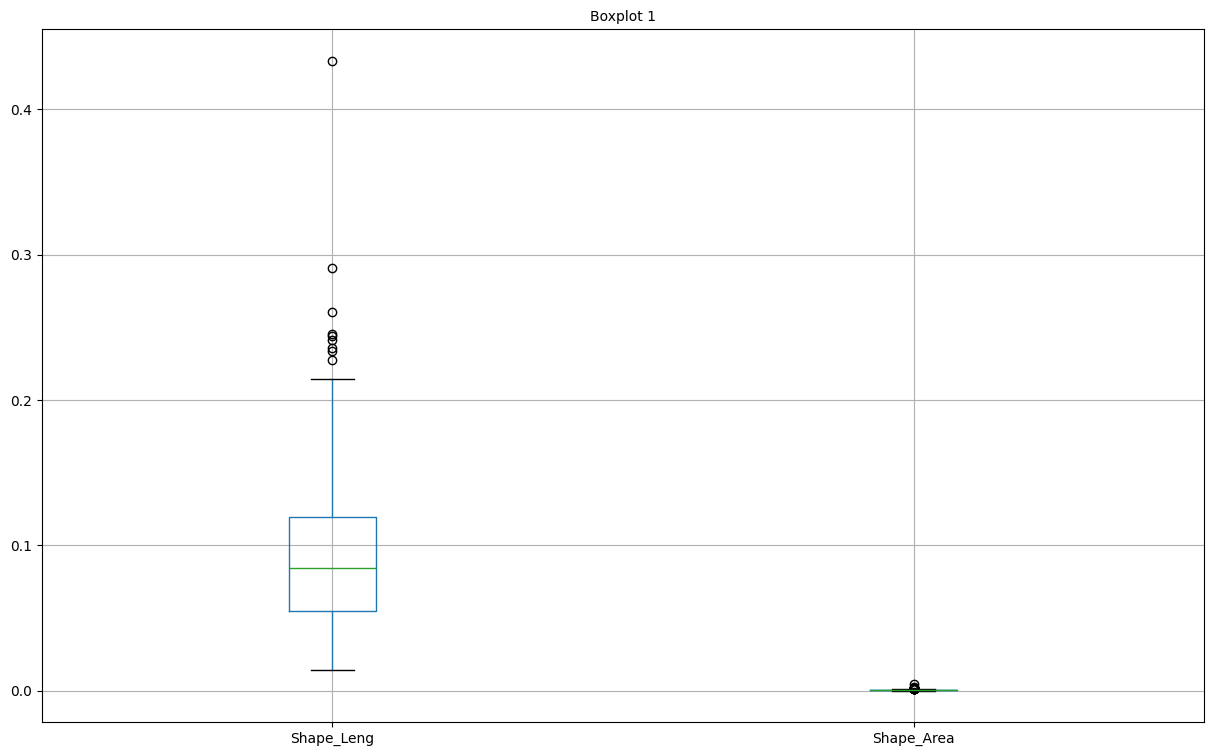

In [96]:
num_cols = ['Shape_Leng', 'Shape_Area']

plt.figure(figsize=(15,9))
df_localizacion[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

Representacion outliers autos_combustion

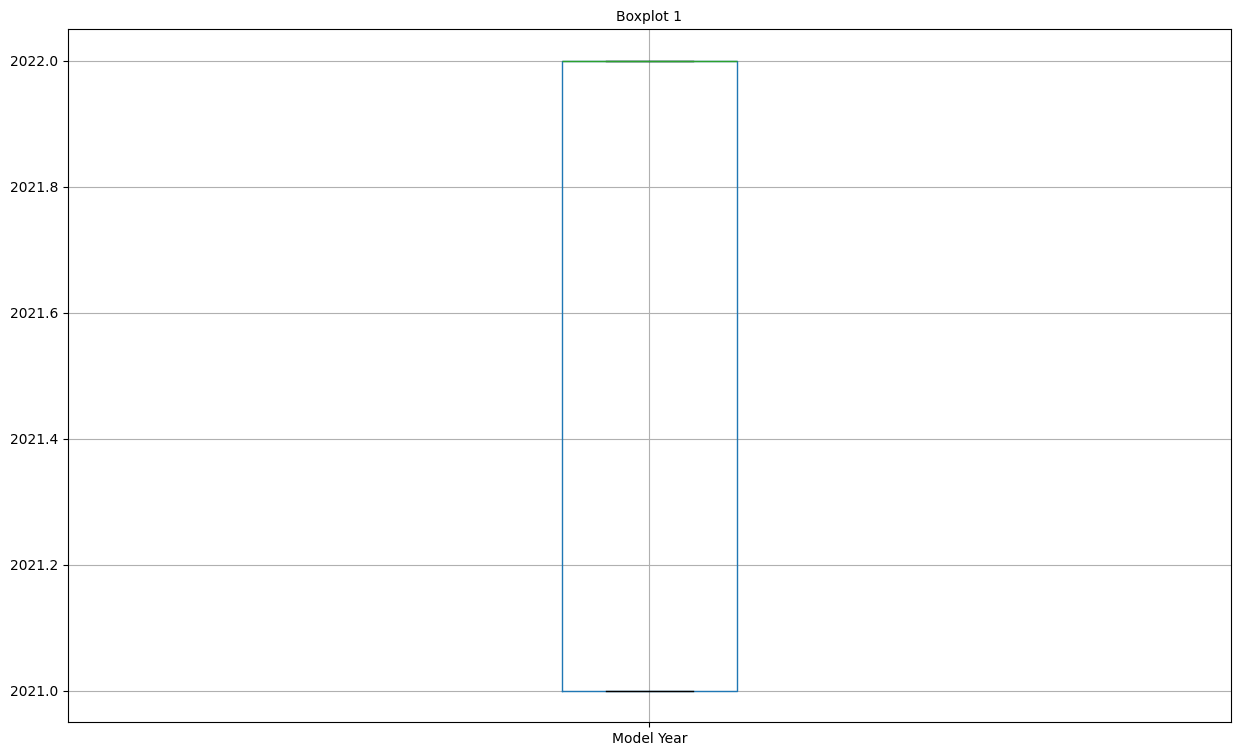

In [97]:
num_cols = ['Model Year']

plt.figure(figsize=(15,9))
df_combustion_cleaned[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

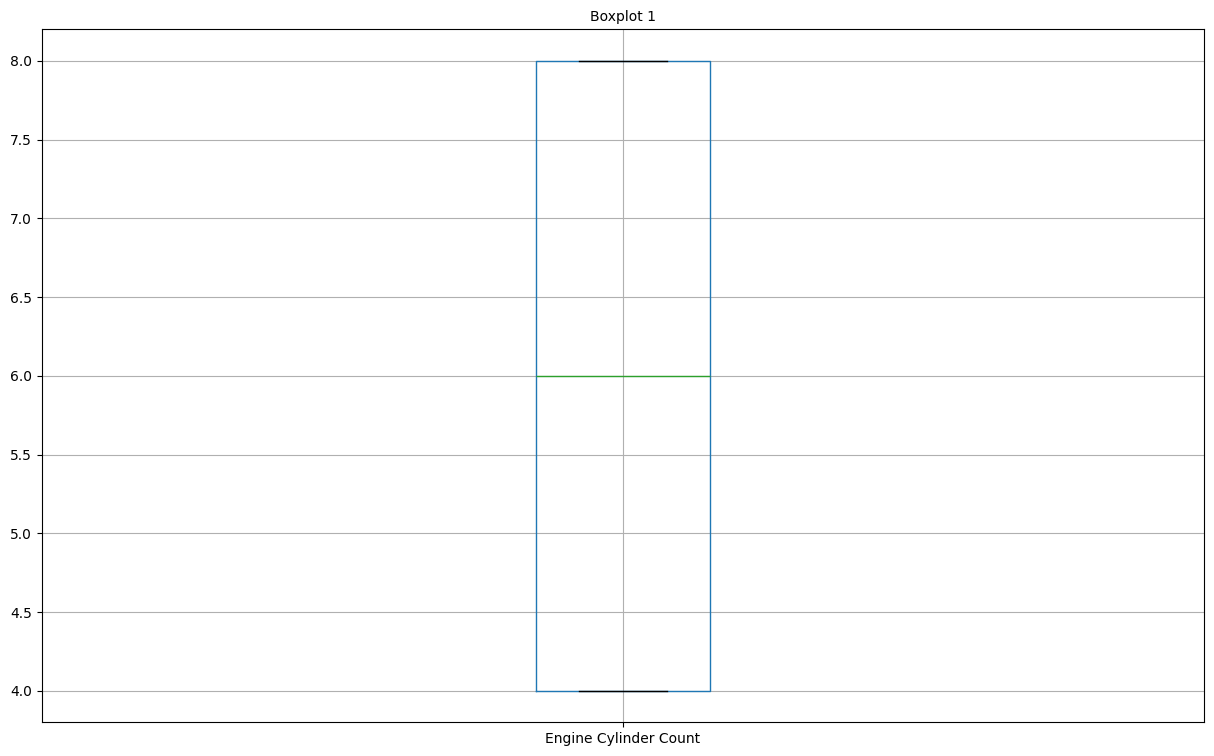

In [98]:
num_cols = ['Engine Cylinder Count']

plt.figure(figsize=(15,9))
df_combustion_cleaned[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

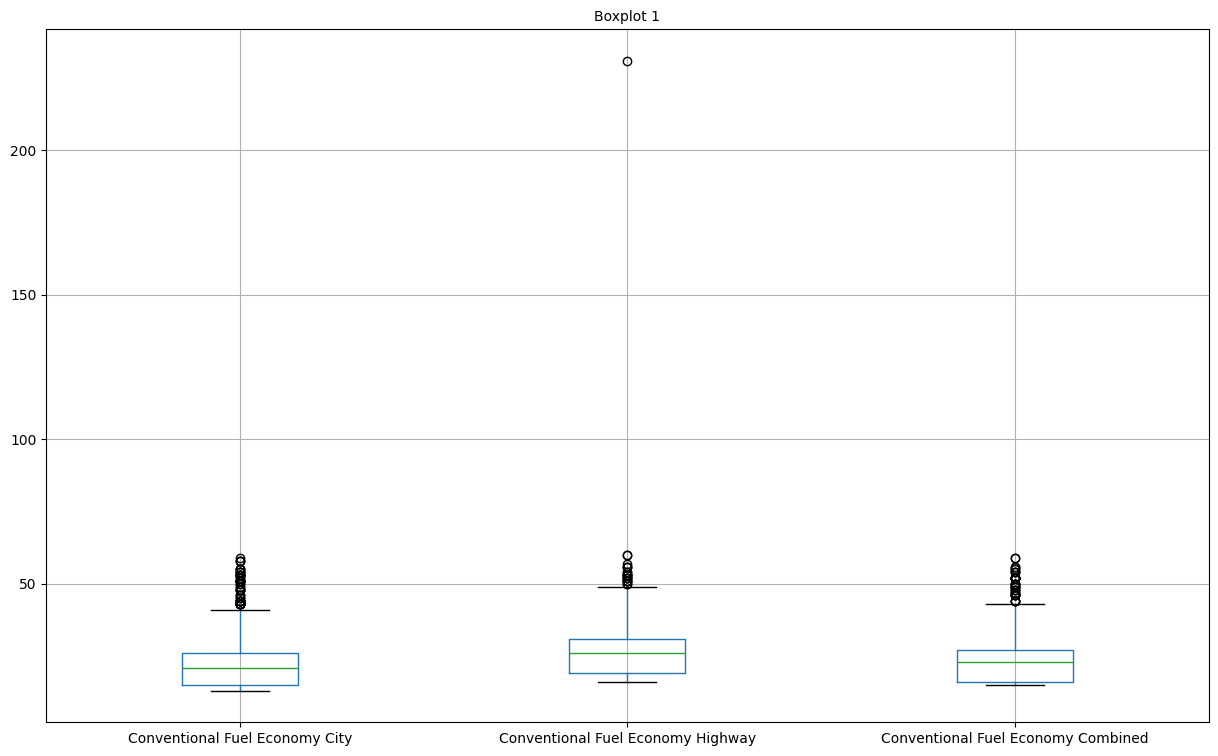

In [99]:
num_cols = ['Conventional Fuel Economy City', 'Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined']

plt.figure(figsize=(15,9))
df_combustion_cleaned[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

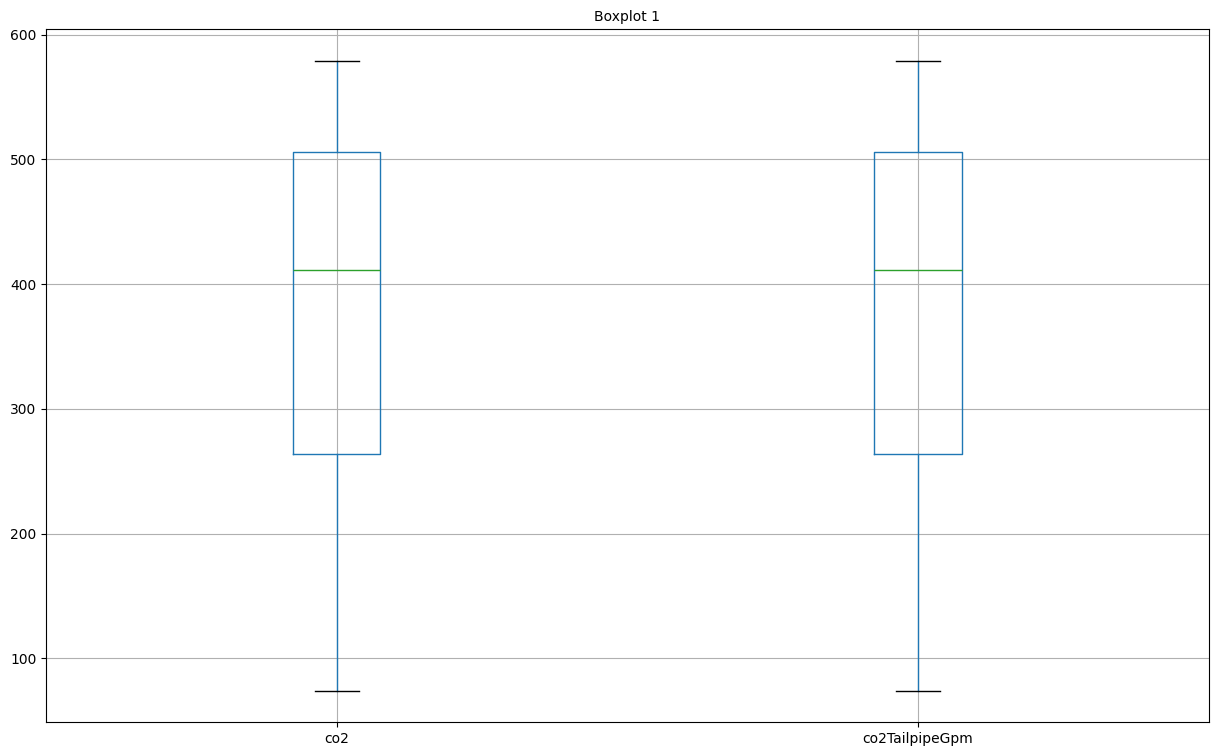

In [100]:
num_cols = ['co2', 'co2TailpipeGpm']

plt.figure(figsize=(15,9))
df_combustion_cleaned[num_cols].boxplot()
plt.title("Boxplot 1", fontsize=10)
plt.show()

<p style="font-size:18px;"><u>Verificación de la existencia de registros duplicados </u> </p>

<p style="font-size:15px;">Busco registros duplicados en los datasets taxis</p>

In [101]:
duplicated_taxis = df_taxis_cleaned[df_taxis_cleaned.duplicated()]
duplicated_taxis

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,ehail_fee,trip_type,taxi_type


<p style="font-size:15px;">Busco registros duplicados en el dataset de localizaciones</p>

In [102]:
duplicated_localizacion = df_localizacion[df_localizacion.duplicated()]
duplicated_localizacion

,LocationID,Borough,Zone,service_zone,Shape_Leng,Shape_Area


<p style="font-size:15px;">Busco registros duplicados en el dataset de autos_combustion</p>

In [103]:
duplicated_combustion = df_combustion_cleaned[df_combustion_cleaned.duplicated()]
duplicated_combustion

,Model,Model Year,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Manufacturer,Category,Fuel,co2,co2TailpipeGpm,fuelType
10,A6 quattro,2022,21.0,30.0,24.0,Auto,SI,3.0L,6.0,Audi,Sedan/Wagon,Hybrid Electric,361.0,361.0,Premium
12,A6 quattro,2022,23.0,33.0,26.0,Auto,SI,2.0L,4.0,Audi,Sedan/Wagon,Hybrid Electric,335.0,335.0,Premium
62,Silverado 2WD,2022,15.0,19.0,16.0,Auto,SI,5.3L,8.0,Chevrolet,Pickup,Ethanol (E85),484.0,484.0,Regular
64,Silverado 2WD,2022,15.0,19.0,16.0,Auto,SI,5.3L,8.0,Chevrolet,Pickup,Ethanol (E85),555.0,555.0,Gasoline or E85
66,Silverado 2WD,2022,15.0,19.0,16.0,Auto,SI,5.3L,8.0,Chevrolet,Pickup,Ethanol (E85),489.0,489.0,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1500 2WD,2021,17.0,23.0,19.0,Auto,SI,5.7L,8.0,Ram,Pickup,Hybrid Electric,514.0,514.0,Midgrade
503,1500 4WD,2021,17.0,22.0,19.0,Auto,SI,5.7L,8.0,Ram,Pickup,Hybrid Electric,472.0,472.0,Midgrade
505,1500 4WD,2021,17.0,22.0,19.0,Auto,SI,5.7L,8.0,Ram,Pickup,Hybrid Electric,523.0,523.0,Midgrade
507,1500 4WD,2021,19.0,24.0,21.0,Auto,SI,3.6L,6.0,Ram,Pickup,Hybrid Electric,417.0,417.0,Regular


<p style="font-size:15px;">Borro registros duplicados en el dataset de autos_combustion</p>

In [104]:
df_combustion_cleaned = df_combustion_cleaned.drop_duplicates()

<p style="font-size:15px;">Busco registros duplicados en el dataset de autos_electricos</p>

In [105]:
duplicated_electricos = df_electricos[df_electricos.duplicated()]
duplicated_electricos

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
46,Kia,e-Soul 64 kWh,7.9,167,365,175,340,Yes,FWD,Type 2 CCS,SUV,B,5,36837
94,Kia,e-Soul 64 kWh,7.9,167,365,175,320,Yes,FWD,Type 2 CCS,SUV,B,5,36837


<p style="font-size:15px;">Borro registros duplicados en el dataset de autos_electricos</p>

In [106]:
df_electricos = df_electricos.drop_duplicates()

<p style="font-size:20px;"><u>Conclusiones</u></p>
<br>
<ul>
    <li><strong>Calidad de los Datos y Limpieza Inicial:</strong><br>
        Se identificaron y manejaron valores nulos en los conjuntos de datos de taxis y ubicaciones mediante eliminación de filas con datos faltantes. Esto asegura la integridad de los análisis posteriores.
    </li>
    <br>
    <br>
    <li><strong>Detección y Tratamiento de Outliers:</strong><br>
        Utilizando el método del rango intercuartil (IQR), se identificaron outliers en características clave como el número de pasajeros y la distancia de los viajes en taxis. Estos outliers pueden ser indicativos de anomalías o situaciones especiales que podrían requerir una atención adicional.
    </li>
    <br>
    <br>
    <li><strong>Eliminación de Registros Duplicados:</strong><br>
        Se encontraron registros duplicados en los conjuntos de datos de taxis y combustión, los cuales fueron eliminados para evitar distorsiones en los análisis y resultados futuros.
    </li>
    <br>
    <br>
    <li><strong>Uso de Métodos Gráficos para Visualización:</strong><br>
        Se emplearon gráficos de caja (boxplots) para visualizar la distribución de características importantes como la tarifa del viaje y la cantidad de propinas. Estos gráficos proporcionan una comprensión clara de la variabilidad y la presencia de outliers en los datos.
    </li>
    <br>
    <br>
    <li><strong>Impacto Potencial en la Sostenibilidad Ambiental:</strong><br>
        A través del análisis de datos de vehículos de combustión y eléctricos, se subraya la relevancia de evaluar el impacto ambiental de los servicios de transporte urbano. Los datos sugieren una posible transición hacia opciones más sostenibles como los vehículos eléctricos.
    </li>
    <br>
    <br>
    <li><strong>Necesidad de Análisis Continuo y Mejora:</strong><br>
        El EDA destaca la importancia de continuar monitorizando y mejorando la calidad de los datos en relación con los servicios de taxis en Nueva York. Esto no solo garantiza la precisión de los resultados actuales, sino que también apoya la toma de decisiones informadas para futuras iniciativas de transporte urbano.
    </li>
</ul>
